In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm

#confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Weightless neural networks (WNNs)
from wisard import Wisard

# OpenCV 
#import cv2
import torchvision
import torchvision.datasets as datasets
import torch
%matplotlib inline

In [2]:
def load_mnist_data():
    train_data = datasets.EMNIST(root='./dataset/emnist/', split='mnist', train=True, download=True)
    test_data = datasets.EMNIST(root='./dataset/emnist/', split='mnist',  train=False, download=True)
    
    X_train = []
    y_train = []
    X_test = []
    y_test = []
   
    for x, y in tqdm(train_data, ncols=100, desc="Loading EMNIST train data"):
        X_train.append(np.asarray(x).flatten())
        y_train.append(y)

    for x, y in tqdm(test_data, ncols=100, desc="Loading EMNIST test data"):
        X_test.append(np.asarray(x).flatten())
        y_test.append(y)

    return np.array(X_train), np.array(y_train), np.array(X_test), np.array(y_test)


In [3]:
X_train, y_train, X_val, y_val = load_mnist_data()

print('Number of training samples: %s ' % len(X_train))
print('Number of test samples: %s ' % len(X_val))
classes = np.unique(y_train)
print('Classes:', classes)    
print('Train Class Distribution: %s' % np.bincount(y_train))
y_val_bin = np.bincount(y_val)
print('Test Class Distribution: %s' % y_val_bin)

Loading EMNIST test data: 100%|████████████████████████████| 10000/10000 [00:00<00:00, 21781.53it/s]


Number of training samples: 60000 
Number of test samples: 10000 
Classes: [0 1 2 3 4 5 6 7 8 9]
Train Class Distribution: [6000 6000 6000 6000 6000 6000 6000 6000 6000 6000]
Test Class Distribution: [1000 1000 1000 1000 1000 1000 1000 1000 1000 1000]


In [4]:
def train_test_wisard(X_train, y_train, X_val, y_val, entrySize, addr):
    wsd = Wisard(num_of_htables=entrySize//addr, input_addr_length=addr)
    
    print(f'num_of_htables={entrySize//addr}')
    print(f'entrySize={entrySize}')
    print(f'input_addr_length={addr}')
    
    start_time = time.time()
    #train loop
    for i, x in enumerate(tqdm(X_train, ncols=100, desc="Training")):        
        wsd.train(x, classes[y_train[i]])
    end_time = time.time()
    train_time = end_time - start_time
    
    y_pred = np.zeros(len(y_val))
    acertos = 0

    
    #test loop
    for i, x in enumerate(tqdm(X_val, ncols=100, desc=" Testing")):                        
        (disc, acc, conf) = wsd.classify(x)
        y_pred[i] = disc

        if y_pred[i] == y_val[i]:
            acertos += 1

    
    accuracy = acertos/len(X_val)      

    cm = confusion_matrix(y_val, y_pred, labels=classes)
    
    return accuracy, cm, train_time


num_of_htables=392
entrySize=784
input_addr_length=2


 Testing: 100%|██████████████████████████████████████████████| 10000/10000 [00:17<00:00, 577.10it/s]


Accuracy:   0.10
Total Training Execution Time: 77.22 seconds


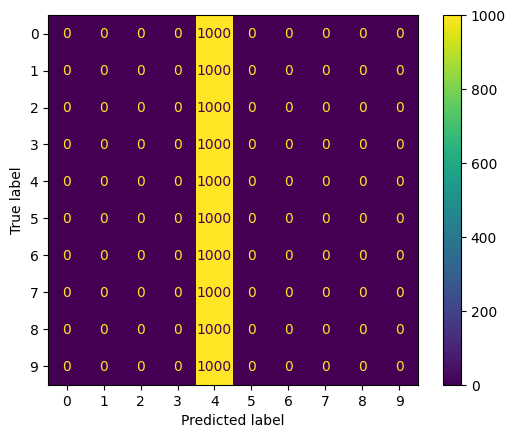

num_of_htables=196
entrySize=784
input_addr_length=4


 Testing: 100%|██████████████████████████████████████████████| 10000/10000 [00:10<00:00, 919.00it/s]


Accuracy:   0.16
Total Training Execution Time: 49.18 seconds


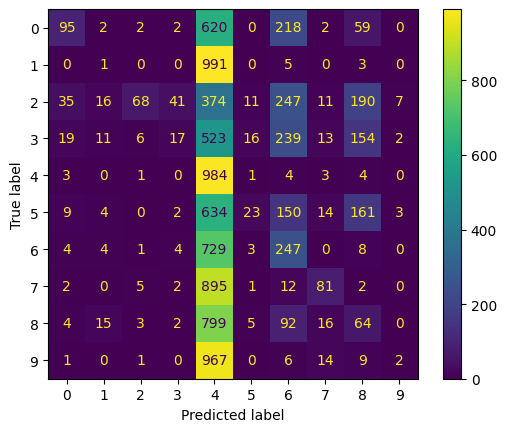

num_of_htables=130
entrySize=784
input_addr_length=6


 Testing: 100%|█████████████████████████████████████████████| 10000/10000 [00:08<00:00, 1113.93it/s]


Accuracy:   0.61
Total Training Execution Time: 40.04 seconds


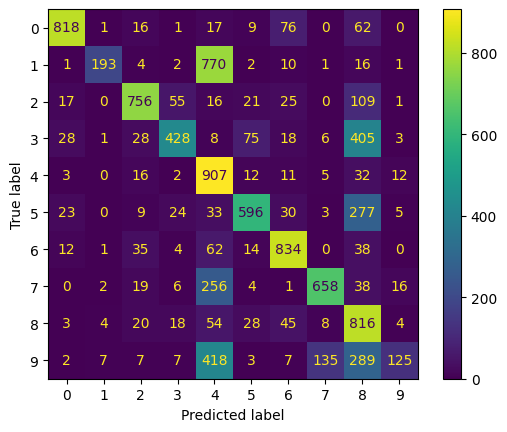

num_of_htables=98
entrySize=784
input_addr_length=8


 Testing: 100%|█████████████████████████████████████████████| 10000/10000 [00:07<00:00, 1270.92it/s]


Accuracy:   0.83
Total Training Execution Time: 35.16 seconds


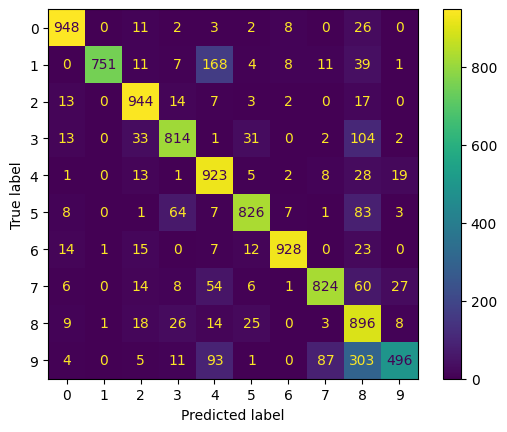

num_of_htables=78
entrySize=784
input_addr_length=10


 Testing: 100%|█████████████████████████████████████████████| 10000/10000 [00:06<00:00, 1436.07it/s]


Accuracy:   0.90
Total Training Execution Time: 33.11 seconds


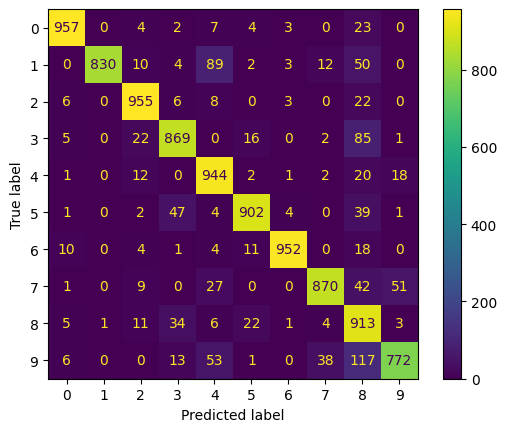

num_of_htables=65
entrySize=784
input_addr_length=12


 Testing: 100%|█████████████████████████████████████████████| 10000/10000 [00:07<00:00, 1398.27it/s]


Accuracy:   0.92
Total Training Execution Time: 31.96 seconds


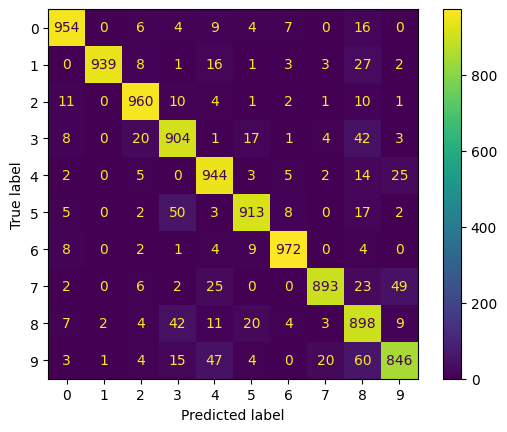

num_of_htables=56
entrySize=784
input_addr_length=14


 Testing: 100%|█████████████████████████████████████████████| 10000/10000 [00:07<00:00, 1408.65it/s]


Accuracy:   0.92
Total Training Execution Time: 32.35 seconds


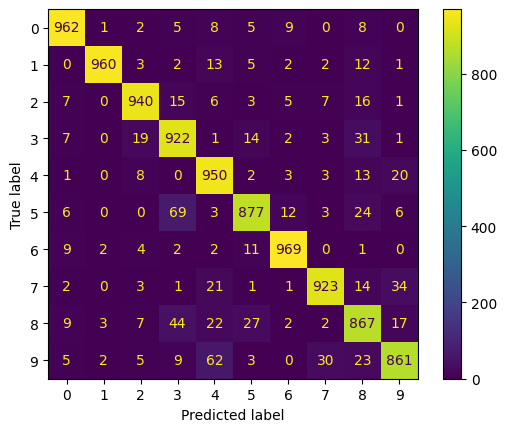

num_of_htables=49
entrySize=784
input_addr_length=16


 Testing: 100%|█████████████████████████████████████████████| 10000/10000 [00:06<00:00, 1501.67it/s]


Accuracy:   0.92
Total Training Execution Time: 31.41 seconds


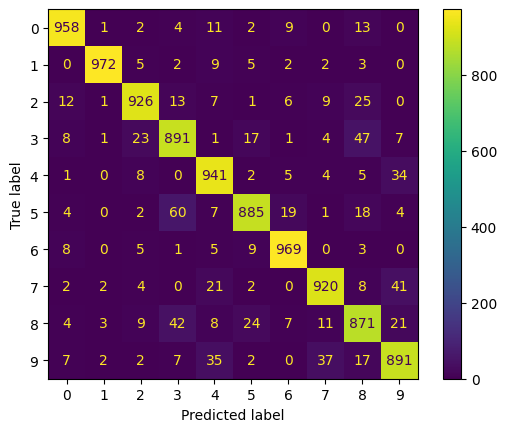

num_of_htables=43
entrySize=784
input_addr_length=18


 Testing: 100%|█████████████████████████████████████████████| 10000/10000 [00:06<00:00, 1496.31it/s]


Accuracy:   0.91
Total Training Execution Time: 31.32 seconds


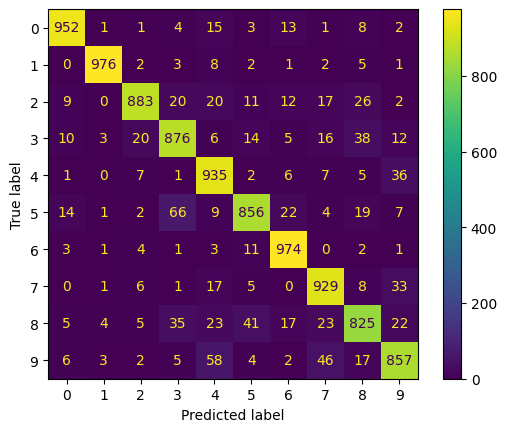

num_of_htables=39
entrySize=784
input_addr_length=20


 Testing: 100%|█████████████████████████████████████████████| 10000/10000 [00:06<00:00, 1596.75it/s]


Accuracy:   0.87
Total Training Execution Time: 31.65 seconds


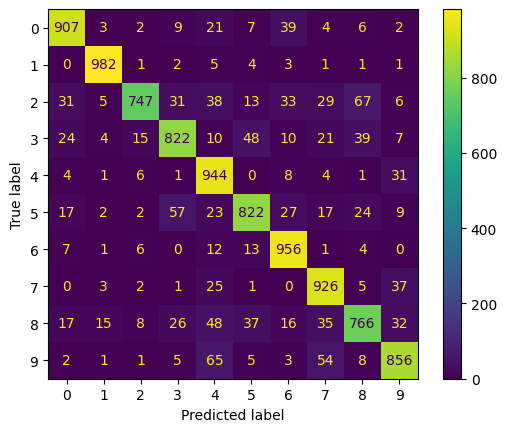

num_of_htables=35
entrySize=784
input_addr_length=22


 Testing: 100%|█████████████████████████████████████████████| 10000/10000 [00:06<00:00, 1619.21it/s]


Accuracy:   0.81
Total Training Execution Time: 31.31 seconds


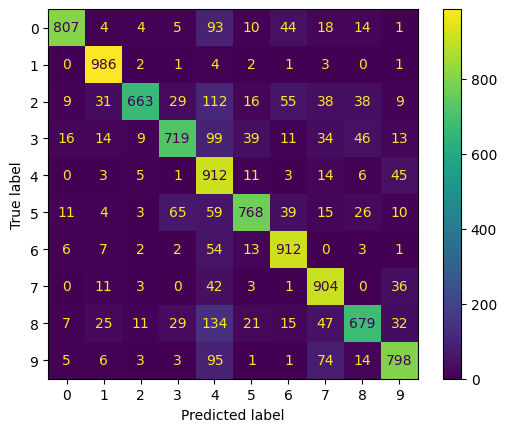

num_of_htables=32
entrySize=784
input_addr_length=24


 Testing: 100%|█████████████████████████████████████████████| 10000/10000 [00:06<00:00, 1628.32it/s]


Accuracy:   0.69
Total Training Execution Time: 30.02 seconds


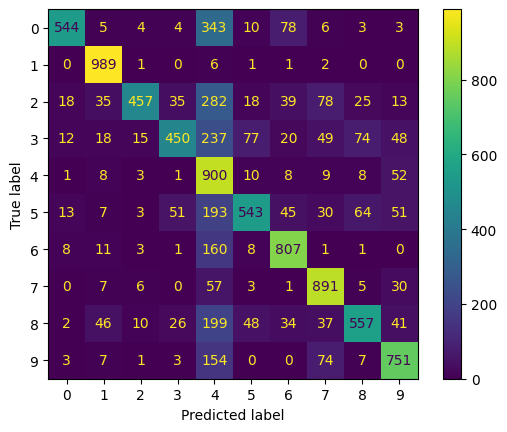

num_of_htables=30
entrySize=784
input_addr_length=26


 Testing: 100%|█████████████████████████████████████████████| 10000/10000 [00:05<00:00, 1674.57it/s]


Accuracy:   0.65
Total Training Execution Time: 30.68 seconds


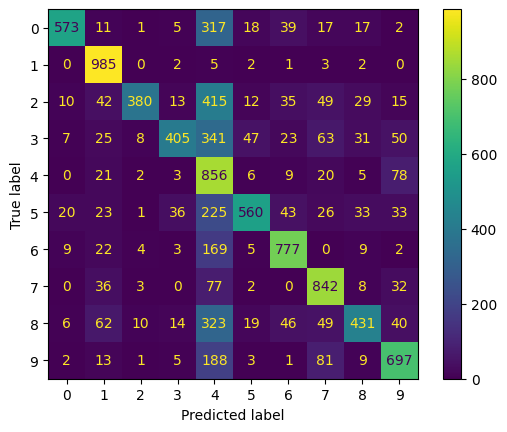

num_of_htables=28
entrySize=784
input_addr_length=28


 Testing: 100%|█████████████████████████████████████████████| 10000/10000 [00:05<00:00, 1687.85it/s]


Accuracy:   0.55
Total Training Execution Time: 30.85 seconds


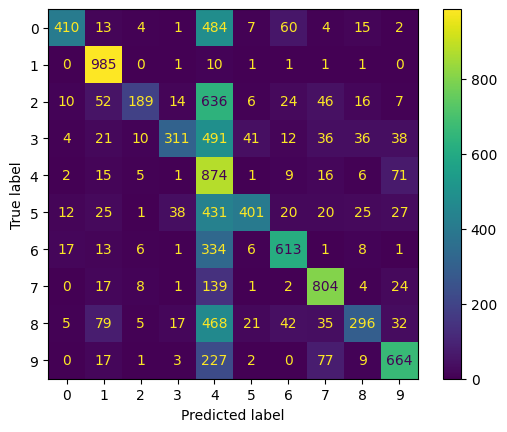

num_of_htables=26
entrySize=784
input_addr_length=30


 Testing: 100%|█████████████████████████████████████████████| 10000/10000 [00:05<00:00, 1723.86it/s]


Accuracy:   0.42
Total Training Execution Time: 30.23 seconds


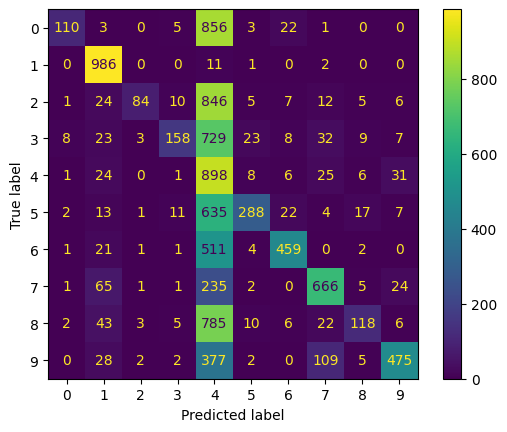

num_of_htables=24
entrySize=784
input_addr_length=32


 Testing: 100%|█████████████████████████████████████████████| 10000/10000 [00:05<00:00, 1745.27it/s]


Accuracy:   0.39
Total Training Execution Time: 29.92 seconds


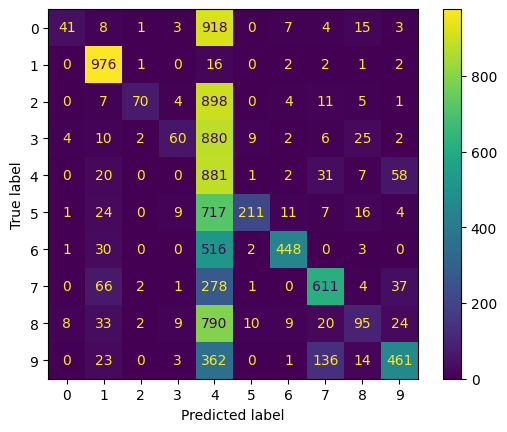

num_of_htables=23
entrySize=784
input_addr_length=34


 Testing: 100%|█████████████████████████████████████████████| 10000/10000 [00:05<00:00, 1749.56it/s]


Accuracy:   0.32
Total Training Execution Time: 30.11 seconds


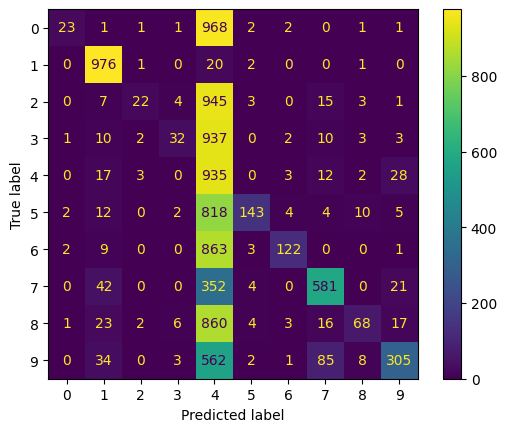

num_of_htables=21
entrySize=784
input_addr_length=36


 Testing: 100%|█████████████████████████████████████████████| 10000/10000 [00:05<00:00, 1880.21it/s]


Accuracy:   0.26
Total Training Execution Time: 28.48 seconds


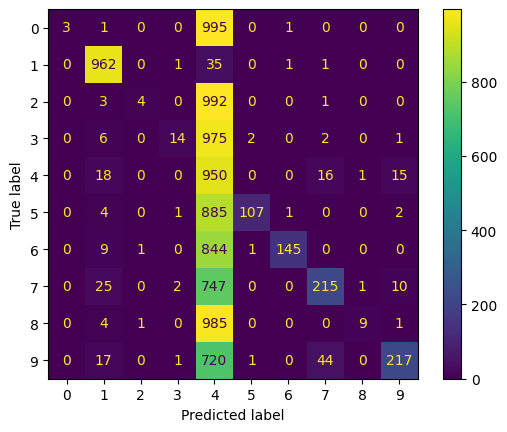

num_of_htables=20
entrySize=784
input_addr_length=38


 Testing: 100%|█████████████████████████████████████████████| 10000/10000 [00:05<00:00, 1924.20it/s]


Accuracy:   0.26
Total Training Execution Time: 27.98 seconds


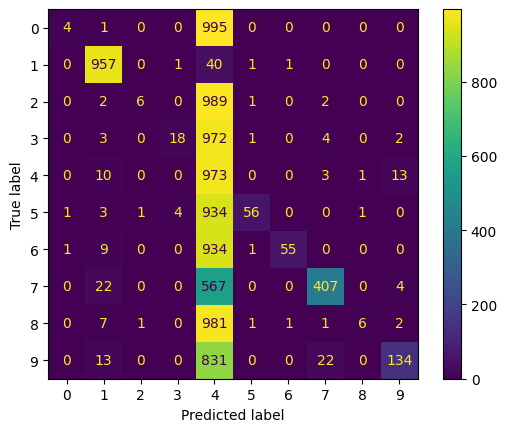

num_of_htables=19
entrySize=784
input_addr_length=40


 Testing: 100%|█████████████████████████████████████████████| 10000/10000 [00:05<00:00, 1932.28it/s]


Accuracy:   0.23
Total Training Execution Time: 28.13 seconds


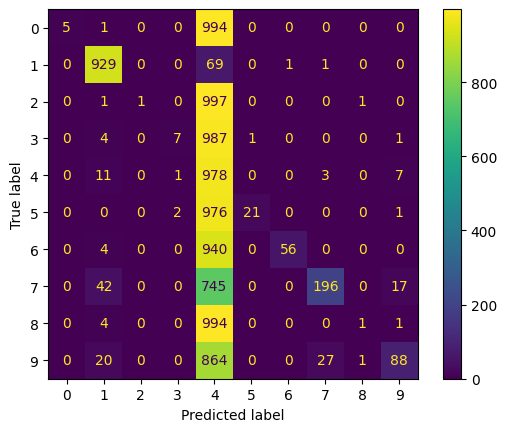

num_of_htables=18
entrySize=784
input_addr_length=42


 Testing: 100%|█████████████████████████████████████████████| 10000/10000 [00:05<00:00, 1971.84it/s]


Accuracy:   0.20
Total Training Execution Time: 27.59 seconds


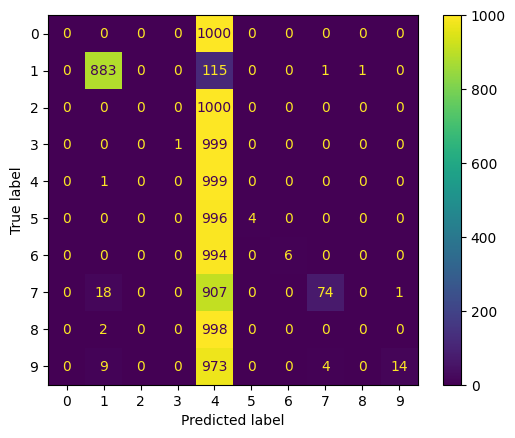

num_of_htables=17
entrySize=784
input_addr_length=44


 Testing: 100%|█████████████████████████████████████████████| 10000/10000 [00:05<00:00, 1996.71it/s]


Accuracy:   0.19
Total Training Execution Time: 27.30 seconds


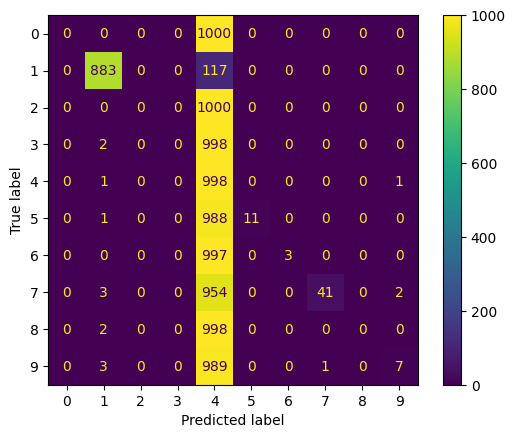

num_of_htables=17
entrySize=784
input_addr_length=46


 Testing: 100%|█████████████████████████████████████████████| 10000/10000 [00:05<00:00, 1901.06it/s]


Accuracy:   0.20
Total Training Execution Time: 28.61 seconds


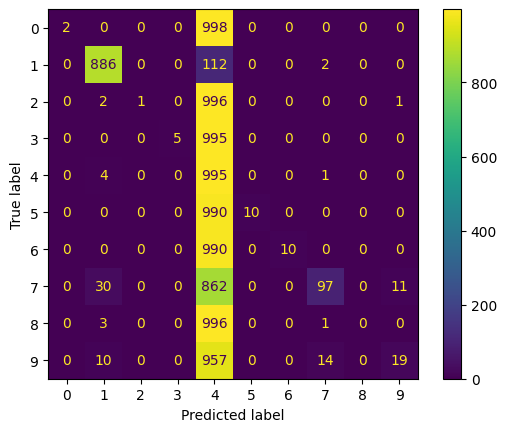

num_of_htables=16
entrySize=784
input_addr_length=48


 Testing: 100%|█████████████████████████████████████████████| 10000/10000 [00:05<00:00, 1961.47it/s]


Accuracy:   0.22
Total Training Execution Time: 27.98 seconds


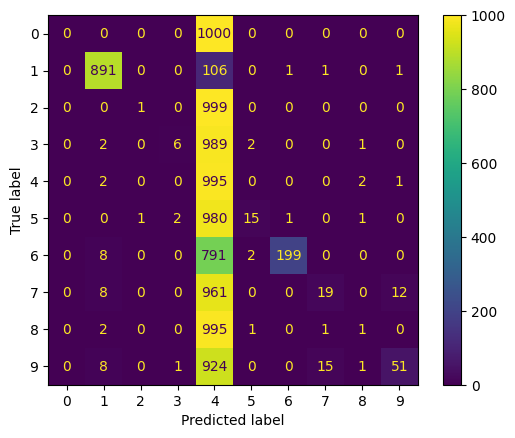

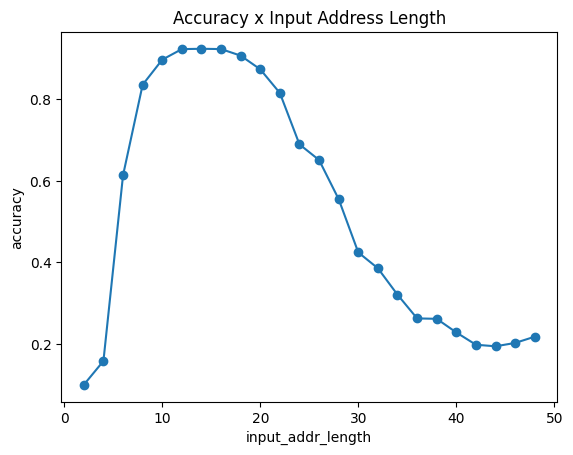

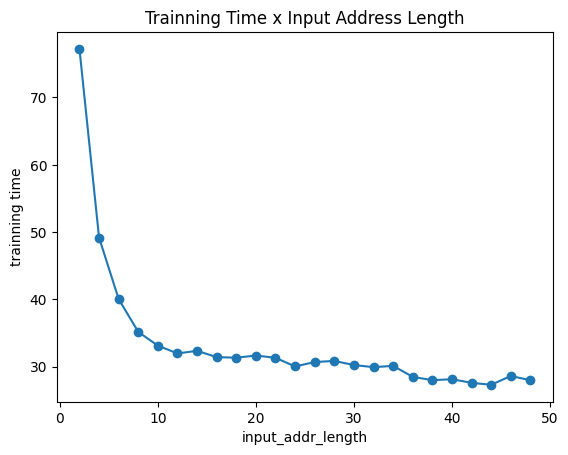

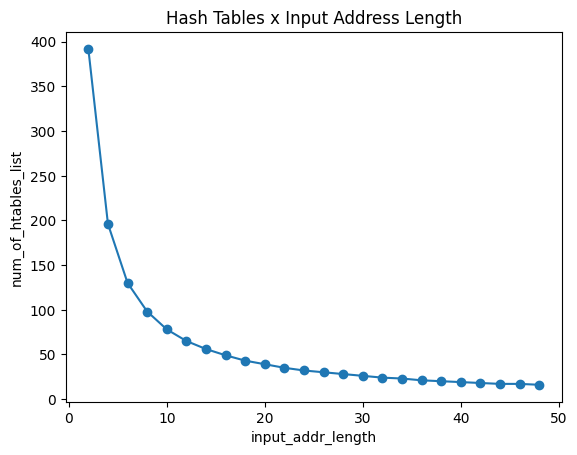

 input_addr_length  num_of_htables  accuracy  trainning_time
                 2             392    0.1000       77.224585
                 4             196    0.1582       49.175164
                 6             130    0.6131       40.035969
                 8              98    0.8350       35.159672
                10              78    0.8964       33.114186
                12              65    0.9223       31.960353
                14              56    0.9231       32.349337
                16              49    0.9224       31.412985
                18              43    0.9063       31.324463
                20              39    0.8728       31.650375
                22              35    0.8148       31.311649
                24              32    0.6889       30.024169
                26              30    0.6506       30.683248
                28              28    0.5547       30.845882
                30              26    0.4242       30.232175
                32      

In [5]:

# Definir a lista de valores de addr
addr_list = list(range(2, 49, 2))
#addr_list = [8, 16, 24]

# Listas para armazenar as accuracies e as tabelas de confusão
accuracy_list = []
cm_list = []
ttime_list = []
num_of_htables_list = []

# Loop para testar para cada valor de addr
for addr in addr_list:
    # Executar a função train_test_wisard
    accuracy, cm, ttime = train_test_wisard(entrySize=X_train[0].shape[0], addr=addr, 
                                     X_train=X_train, y_train=y_train, X_val=X_val, y_val=y_val)
    
    # Adicionar a accuracy e a tabela de confusão à lista
    accuracy_list.append(accuracy)
    print('Accuracy: %6.2f' % (accuracy))
    ttime_list.append(ttime)
    print("Total Training Execution Time: {:.2f} seconds".format(ttime))
    cm_list.append(cm)
    
    num_of_htables_list.append(X_train[0].shape[0]//addr)
    
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
    disp.plot()
    plt.show()
    

# Plotar o gráfico de Accuracy x Input Address Length
plt.plot(addr_list, accuracy_list, 'o-')
plt.xlabel('input_addr_length')
plt.ylabel('accuracy')
plt.title('Accuracy x Input Address Length')
plt.show()


# Plotar o gráfico de Accuracy x Input Address Length
plt.plot(addr_list, ttime_list, 'o-')
plt.xlabel('input_addr_length')
plt.ylabel('trainning time')
plt.title('Trainning Time x Input Address Length')
plt.show()

# Plotar o gráfico de Accuracy x num_of_htables_list
plt.plot(addr_list, num_of_htables_list, 'o-')
plt.xlabel('input_addr_length')
plt.ylabel('num_of_htables_list')
plt.title('Hash Tables x Input Address Length')
plt.show()

# Criar e Mostrar tabela 
table_data = []
for i, addr in enumerate(addr_list):
    row = [addr, accuracy_list[i]]
    table_data.append(row)
table_data = {'input_addr_length': addr_list, 'num_of_htables': num_of_htables_list, 
              'accuracy': accuracy_list, 'trainning_time': ttime_list}
df = pd.DataFrame(table_data)
print(df.to_string(index=False))